In [24]:
from scipy.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.optimize import minimize as pymoo_minimize
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def schaffer(x):
    f1 = x**2
    f2 = (x - 2)**2
    return np.array([f1, f2])

In [26]:
def objective(x, function, w):
    f = function(x)
    f1, f2 = f
    f = w*f1 + (1 - w)*f2
    #print(f'x = {x}, f = {f}') # Uncomment this if you wish to see the →optimization progress!
    return f

In [27]:
print('======= SINGLE-OBJECTIVE OPTIMIZATION WITH WEIGHTED SUM =======')
w_array = np.linspace(0, 1, 10)
x_opt_array = np.zeros((w_array.shape[0], 2))
print(f"x_opt_array = {x_opt_array}")
f_opt_weighted_sum = np.zeros((w_array.shape[0], 2))
print(f"f_opt_weighted_sum = {f_opt_weighted_sum}")

======= SINGLE-OBJECTIVE OPTIMIZATION WITH WEIGHTED SUM =======
x_opt_array = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
f_opt_weighted_sum = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [30]:
for i, w in enumerate(w_array):
    res = minimize(lambda x: objective(x, schaffer, w), x0 = 1)
    x_opt = res.x
    print(f'x_opt = {x_opt}')
    x_opt_array[i] = x_opt
    #print(f"not flat: {schaffer(x_opt)}" )
    #print(f"flat: {schaffer(x_opt).flatten()}")
    f_opt_weighted_sum[i] = schaffer(x_opt).flat

x_opt = [1.99999999]
x_opt = [1.77777777]
x_opt = [1.55555555]
x_opt = [1.33333332]
x_opt = [1.1111111]
x_opt = [0.88888889]
x_opt = [0.66666667]
x_opt = [0.44444444]
x_opt = [0.22222222]
x_opt = [-7.45036449e-09]


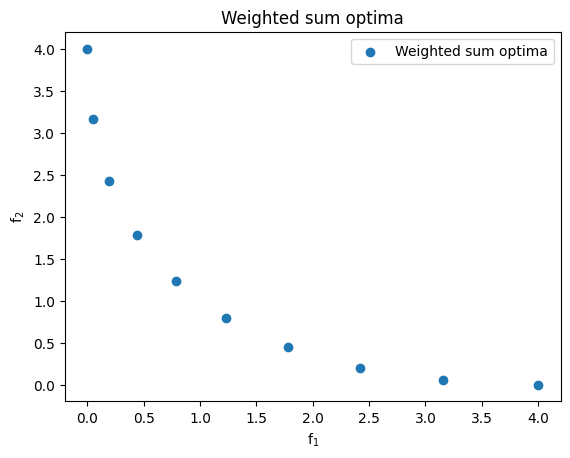

In [29]:
plt.scatter(f_opt_weighted_sum[:, 0], f_opt_weighted_sum[:, 1], label = f'Weighted sum optima', alpha = 1)
plt.xlabel(r'f$_{1}$')
plt.ylabel(r'f$_{2}$')
plt.title('Weighted sum optima')
plt.legend()

In [31]:
class schaffer_problem(Problem):
    def __init__(self):
        super().__init__(n_var = 1,
                        n_obj = 2,
                        xl = -10,
                        xu = 10,
                        )
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x**2
        f2 = (x - 2)**2
        out["F"] = np.column_stack([f1, f2])

In [32]:
print('======= MULTI-OBJECTIVE OPTIMIZATION WITH NSGA2 =======')
pop_size = 100 # The initial population size used in the genetic algorithm
algorithm = NSGA2(pop_size = pop_size) # An instance of the NSGA2 algorithm␣→class in Pymoo
res = pymoo_minimize(schaffer_problem(),
                    algorithm,
                    seed = 1, # Since NSGA2 has stochasticity, setting the seed␣allows us consistently to obtain the same results
                    verbose = True, # Print out information during the␣optimization
                    )

======= MULTI-OBJECTIVE OPTIMIZATION WITH NSGA2 =======
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     11 |             - |             -
     2 |      200 |     23 |  0.0117280659 |         ideal
     3 |      300 |     44 |  0.0708446393 |         nadir
     4 |      400 |     85 |  0.0075901861 |             f
     5 |      500 |    100 |  0.0589427907 |         nadir
     6 |      600 |    100 |  0.0334398636 |         nadir
     7 |      700 |    100 |  0.0020477274 |             f
     8 |      800 |    100 |  0.0031667282 |             f
     9 |      900 |    100 |  0.0021565188 |             f
    10 |     1000 |    100 |  0.0035614205 |             f
    11 |     1100 |    100 |  0.0020827027 |             f
    12 |     1200 |    100 |  0.0027448680 |             f
    13 |     1300 |    100 |  0.0122589986 |         nadir
    14 |     1400 |    100 |  0.0017086084 |             f
    15 |     1500 |    100 |  0.0024443435 |             f


Text(0, 0.5, 'f$_{2}$')

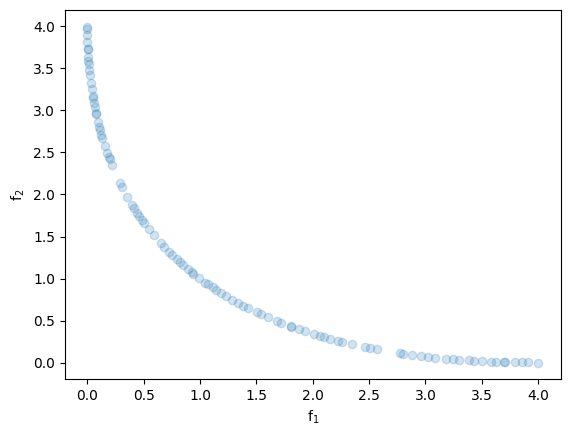

In [34]:
plt.scatter(res.F[:, 0], res.F[:, 1], label = 'NSGA2, multi-objective', alpha = .2)
plt.xlabel(r'f$_{1}$')
plt.ylabel(r'f$_{2}$')